### Convolutional Neural Networks(CNN) - With Digits of MNIST Dataset

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Deep Learning Libraries 
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Activation,Dropout
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#Evoluation Libraries 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Visualization Liraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [2]:
from keras.datasets import mnist                           #Digit MNIST Dataset Load
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train.ndim

3

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train.shape[0]

60000

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #CNN needs 4D input data so have to convert 3D to 4D
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_train.ndim

4

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train /= 255       #Normalization of input Training set
x_test /= 255        #Normalization of input Test set

In [12]:
#CNN Architecture 

model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))     #Here 28 is Filter 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())                             # Input layer

model.add(Dense(128,activation=tf.nn.relu))      # Hidden layer,   here 128 is neurons
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))    # Output layer


In [13]:
#Compiling Model

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x=x_train, y=y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2054 - accuracy: 0.9392
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0822 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0583 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0438 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0337 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0283 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0216 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0198 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0707 - accuracy: 0.9837


[0.07072680443525314, 0.9836999773979187]

In [15]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
y_test.shape

(10000,)

In [17]:
# Encoding Digit MNISt Labels
#y_train = to_categorical( y_train,num_classes=10)
y_test = to_categorical( y_test,num_classes=10)

In [18]:
y_test.shape

(10000, 10)

In [19]:
y_predict = model.predict(x_test)
y_predicts = np.argmax(y_predict, axis=1)  #Predicted Answer
y_test_eval=np.argmax(y_test, axis=1)     # Actual Answer

313/313 [==============================] - 2s 6ms/step


In [20]:
y_predict.shape

(10000, 10)

In [21]:
y_predicts.shape

(10000,)

In [22]:
y_test_eval[1]

2

In [23]:
y_pred=pd.DataFrame(y_predicts)

In [24]:
y_pred.head()

,0
0,7
1,2
2,1
3,0
4,4


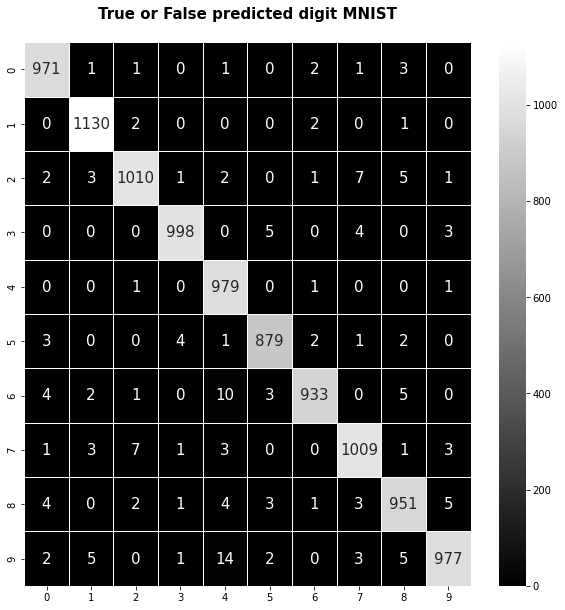

In [25]:
#Confusion Matrix for DIGIT Mnsit
con_mat=confusion_matrix(y_test_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
y_pred.tail()

,0
9995,2
9996,3
9997,4
9998,5
9999,6



Enter Test Sets Row Numbers Between 0-9999: 9997

For the Row of 9997 The Array format of Test digit is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Order of Digits for Array(0-9) is: [Zero, One, Two, Three, Four, Five, Six, Seven, Eight, Nine]



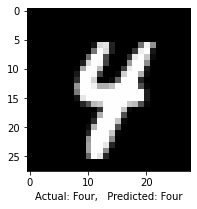

In [28]:
#Testing the Digits

col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

ui=int(input("\nEnter Test Sets Row Numbers Between 0-9999: "))

plt.figure(figsize=(3,3))
plt.imshow(x_test[ui].reshape(28,28), cmap='gray')

plt.xlabel('Actual: {},   Predicted: {}'.format(col_names[y_test_eval[ui]],col_names[y_predicts[ui]]))
plt.show

print('\nFor the Row of {}'.format(ui) + ' The Array format of Test digit is: {}'.format(y_test[ui]) + '\n\nOrder of Digits for Array(0-9) is: [Zero, One, Two, Three, Four, Five, Six, Seven, Eight, Nine]\n')